In [14]:
from matplotlib import pyplot as plt
%matplotlib notebook
import numpy as np
import struct
import math

In [33]:
def plot_data(offx=0, end=-1, signed=False, channels=1):
    with open('/tmp/scope_dump.bin', 'rb') as f:
        raw_data = f.read()
        data = struct.unpack(f'<{len(raw_data)//2}{"h" if signed else "H"}', raw_data)
    
    fig, axs = plt.subplots(channels*2, 1, squeeze=False, sharex=True, figsize=(10, 5))
    axs = axs.flatten()
    for i, (ax_t, ax_f) in enumerate(zip(axs[0::2], axs[1::2])):
        le_slice = data[offx:][:end][i::channels]
        ax_t.plot(np.linspace(0, len(le_slice)/1000, len(le_slice)),
            [math.nan if x==-255 else x for x in le_slice])
        ax_t.grid()   
        
        ax_f.specgram(le_slice, Fs=1000)
        ax_f.grid()
                             
    return data

<IPython.core.display.Javascript object>


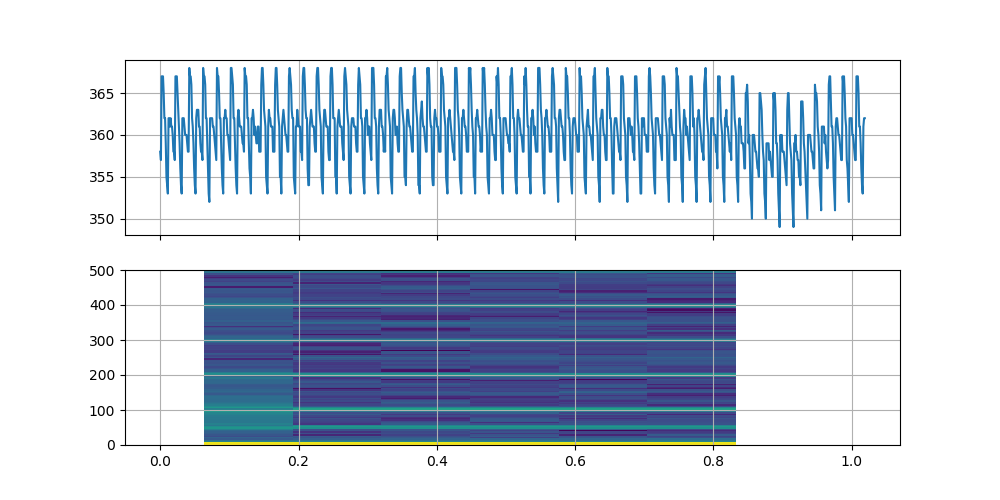

In [40]:
data = plot_data(offx=4, signed=True, channels=1)
#print(''.join(str(x) for x in data[4:][3::4]))

In [32]:
import random, struct, numpy as np

def plot_avg():
    with open('/tmp/foo', 'rb') as f:
        vals = np.frombuffer(f.read(), dtype='uint16')
    
    vals = vals.copy()
    idx = 1
    vals &= 1<<idx
    vals >>= idx
    
    delta = 10000
    plotdata = [sum(vals[i:i+delta])/delta for i in range(0, len(vals), delta)]
    plt.plot(plotdata)
plot_avg()

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/foo'